# DIMA Use Case: Trash Collection

## Introduction

Given the Setup section of the DIMA model, we implemented a decision-making module based on a Trash Collection scenario inspired by a Fishing Village model [1]. We conducted two different scenarios to examine the impact of the model on agent performance and encounters. In the first scenario, agents made decisions based on their personal characteristics, such as competitiveness and sociability. In contrast, the second scenario divided agents into teams based on the color of their t-shirts, utilizing their active identity and salience value from the DIMA module to determine their actions according to the social context. These scenarios will allow us to investigate how the DIMA model affects agent behavior and outcomes.

[1] Thebaud, O., & Locatelli, B. (2001). Modelling the emergence of resource-sharing conventions: an agent-based approach. Jasss-the Journal Of Artificial Societies And Social Simulation, 4(2).

## Preparing the Scenario

We start by running the DIMA model jupyter notebook.

{
  "agents": [
    {
      "name": "Ace",
      "characteristics": [
        {
          "name": "intelligence",
          "value": 0.92
        },
        {
          "name": "charisma",
          "value": 0.1
        }
      ],
      "normativeGroups": []
    },
    {
      "name": "Ben",
      "characteristics": [
        {
          "name": "intelligence",
          "value": 0.7
        },
        {
          "name": "charisma",
          "value": 0.12
        }
      ],
      "normativeGroups": []
    },
    {
      "name": "Cara",
      "characteristics": [
        {
          "name": "intelligence",
          "value": 0.94
        },
        {
          "name": "charisma",
          "value": 0.15
        }
      ],
      "normativeGroups": []
    },
    {
      "name": "Dan",
      "characteristics": [
        {
          "name": "intelligence",
          "value": 0.8
        },
        {
          "name": "charisma",
          "value": 0.05
        }
      ],
      "normativeG

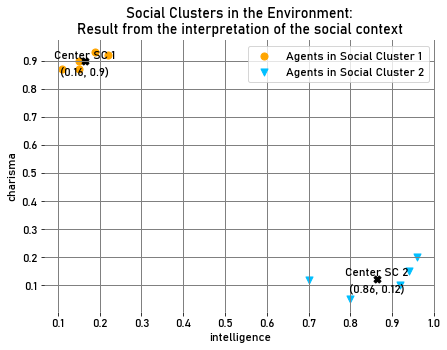

Before Normative Fit
[]
After Normative Fit
[<__main__.SocialGroup object at 0x0000017856B20850>, <__main__.SocialGroup object at 0x0000017856B20700>]
Fitness Group 1
0.675162377156659
Fitness Group 2
0.5627658036306044
Salient Identity
Group 2
Salience
0.538521110827642
Previous accessibility
0.22668443980779898
0.9739682565407481
New accessibility
0.2255015116689159
0.9742428179027207
simulation 0
simulation 1
simulation 2
simulation 3
simulation 4
simulation 5
simulation 6
simulation 7
simulation 8
simulation 9
simulation 10
simulation 11
simulation 12
simulation 13
simulation 14
simulation 15
simulation 16
simulation 17
simulation 18
simulation 19
simulation 20
simulation 21
simulation 22
simulation 23
simulation 24
simulation 25
simulation 26
simulation 27
simulation 28
simulation 29
Salience and Accessibility Plots
Cluster 1
Step = 100
Salience
Mean: 0.668777786586476
Standard Deviation: 3.3306690738754696e-16
Accessibility
Mean: 0.9905436221178822
Standard Deviation: 4.440892098

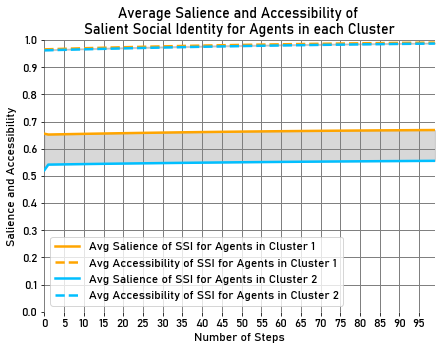

In [1]:
%run ./DynamicIdentityModelForAgents.ipynb

In this trash collection scenario, we simulate a group of work colleagues responsible for cleaning up a beach as a team. The simulation is comprised of three classes: Beach, Trash, and CollectorAgent, which represent the beach environment, the trash items to be collected, and the agents responsible for collecting the trash, respectively.

To introduce personal characteristics that affect decision-making, we focus on competitiveness and sociability. Agents with higher competitiveness ratings will engage in competition with their colleagues to collect more trash. When multiple agents attempt to collect the same trash item, the agent rated higher on competitiveness will claim the item, meaning that agents lower on competitiveness will likely concede. Regarding sociability, agents with higher sociability ratings will try to seek out other agents on the beach, while those with lower sociability ratings will try to avoid them.

In the second scenario, the t-shirt color of the agents becomes relevant. The DIMA model is applied to change the agents' behavior. Agents observe their immediate environment within a radius of 1, determine their active identity, and compute their salience value. Based on this value, agents adjust their behavior towards in-group or out-group members. In-group collisions lead to a decrease in competitiveness, while out-group collisions lead to an increase in competitiveness. When surrounded by in-group members, agents prioritize being more sociable and seek out these members. Conversely, when surrounded by out-group members, agents prioritize being less sociable and try to avoid them. These changes in behavior provide insight into the impact of the DIMA model on agent performance and social interactions in the simulation.

In [2]:
import pygame
import random
import re

#Constants
T_COMPETITIVENESS = 0.5
T_SOCIABILITY = 0.5
MAX_TRASH_CELL = 10
WINDOW_SIZE = (640, 480)
GRID_SIZE = 20
colorsAgents = ["darkorange", "aqua", "green", "purple", "pink", "blue", "red"]

# Define Collector Agent class
class CollectorAgent:
    def __init__(self, x, y):
        self.x = x
        self.y = y
        self.collectedTrash = 0
        self.agentEncounters = 0
        self.color = "black"
        
    def move(self, dx, dy):
        self.x += dx
        self.y += dy
    
    def collectTrash(self):
        self.collectedTrash += 1
    
    def collideAgent(self):
        self.agentEncounters += 1
    
    def draw(self, surface):
        pygame.draw.circle(surface, self.color, (self.x * GRID_SIZE + GRID_SIZE // 2, self.y * GRID_SIZE + GRID_SIZE // 2), 5)

# Define Trash class
class Trash:
    def __init__(self, x, y):
        self.x = x
        self.y = y
        self.amount = random.randint(0, MAX_TRASH_CELL)
        self.color = "saddlebrown"
    
    def collectTrash(self):
        self.amount -= 1
    
    def draw(self, surface):
        pygame.draw.circle(surface, self.color, (self.x * GRID_SIZE + GRID_SIZE // 2, self.y * GRID_SIZE + GRID_SIZE // 2), self.amount)

#Define Beach class
class Beach:
    def __init__(self):        
        self.white = "white"
        self.black = "black"
        self.trashEnd = False
        self.trashCollectedBySocialGroup = []
        self.totalTrash = 0
        
        # Plot lists
        self.competitiveEfficiencies = []
        self.nonCompetitiveEfficiencies = []
        self.sociableEfficiencies = []
        self.unsociableEfficiencies = []
        
        self.competitiveAgentEncounters = []
        self.nonCompetitiveAgentEncounters= []
        self.sociableAgentEncounters = []
        self.unsociableAgentEncounters = []
    
    #Initialize pygame   
    def initGame(self):
        pygame.display.init()
        
        self.screen = pygame.display.set_mode(WINDOW_SIZE)
        pygame.display.set_caption("Beach")
    
    # Create the grid
    def createGrid(self):
        self.grid = []
        for x in range(WINDOW_SIZE[0] // GRID_SIZE):
            row = []
            for y in range(WINDOW_SIZE[1] // GRID_SIZE):
                trash = Trash(x, y)          
                row.append(trash)
                self.totalTrash += trash.amount
            self.grid.append(row)

    # Create the collector agents
    def addScenarioAgents(self, agents):
        for i, a in enumerate(agents):
            x = random.randint(0, len(self.grid) - 1)
            y = random.randint(0, len(self.grid[x]) - 1)
            a.scenario = CollectorAgent(x, y)

    # Move agents
    def exploreGrid(self, a, agents):
        salientIdentity = a.salientIdentity
        collectorAgent = a.scenario
        trash = self.grid[collectorAgent.x][collectorAgent.y]

        #No trash in agent cell
        if trash.amount == 0:       
            # directions: N, S, E, W, NE, NW, SE, SW
            directions = [(0, 1), (0, -1), (-1, 0), (1, 0), (1, -1), (1, 1), (-1, -1), (-1, 1)]

            # Check possible positions
            newDirections = []
            for d in directions:
                if 0 <= collectorAgent.x + d[0] < len(self.grid) and 0 <= collectorAgent.y + d[1] < len(self.grid[0]):
                    newDirections.append((d[0], d[1]))
            directions = newDirections
                        
            # Check trash positions around
            newDirections = []
            for d in directions:
                x = collectorAgent.x + d[0]
                y = collectorAgent.y + d[1]
                trash = self.grid[x][y]
                if trash.amount > 0:
                    newDirections.append((d[0], d[1]))
            if len(newDirections) > 0:
                directions = newDirections
                                           
            # Check positions with other agents
            around = self.agentsAround(agents, (collectorAgent.x, collectorAgent.y), directions)
            newDirections = []

            if (salientIdentity is None):
                if (a.personalCharacteristics["Sociability"] > T_SOCIABILITY): #higher on sociability
                    for d in around:
                        newDirections.append(d)                                    
                else: #lower on sociability
                    #fill new directions with directions not in around to avoid socializing
                    for d in directions:
                        if d not in around:
                            newDirections.append(d)
            else:
                outGroupSociability = a.personalCharacteristics["Sociability"] - salientIdentity.salience * a.personalCharacteristics["Sociability"]
                inGroupSociability = a.personalCharacteristics["Sociability"] + salientIdentity.salience * (1 - a.personalCharacteristics["Sociability"])
                newD = None
                newD_backup = None
                maxAgInGroupSociability = None
                maxAgOutGroupSociability = None
                for d in around:
                    for ag in around[d]:                        
                        agSalientIdentity = ag.salientIdentity
                        if agSalientIdentity is not None:
                            if (agSalientIdentity.name == salientIdentity.name): #in-group
                                agInGroupSociability = ag.personalCharacteristics["Sociability"] + agSalientIdentity.salience * (1 - ag.personalCharacteristics["Sociability"])
                                if maxAgInGroupSociability == None: 
                                    maxAgInGroupSociability = agInGroupSociability
                                    newD = d
                                else: #if more that one select the one with the highest sociability after interpolation
                                    if (agInGroupSociability > maxAgInGroupSociability):
                                        maxAgInGroupSociability = agInGroupSociability
                                        newD = d
                            else: #outgroup
                                agOutGroupSociability = ag.personalCharacteristics["Sociability"] - agSalientIdentity.salience * ag.personalCharacteristics["Sociability"]
                                if maxAgOutGroupSociability == None: 
                                    maxAgOutGroupSociability = agOutGroupSociability
                                    newD_backup = d
                                else: #if more that one select the one with the highest sociability after interpolation
                                    if (agOutGroupSociability > maxAgOutGroupSociability):
                                        maxAgOutGroupSociability = agOutGroupSociability
                                        newD_backup = d
                                
                if (inGroupSociability > T_SOCIABILITY): #higher on sociability
                    if (newD is not None):
                        newDirections.append(newD) #go to meet in group member with highest sociability after interpolation
                    else:
                        if (outGroupSociability > T_SOCIABILITY):
                            if (newD_backup is not None): #in case its not possible to meet in group members and sociability is high, meet out group member with highest sociability after interpolation
                                newDirections.append(newD_backup)
                    

                if (inGroupSociability <= T_SOCIABILITY and outGroupSociability <= T_SOCIABILITY): #lower on sociability
                    #fill new directions with directions not in around to avoid socializing
                    newDirections = []
                    for d in directions:
                        if d not in around:
                            newDirections.append(d)
                    if (len(newDirections) == 0 and newD is not None): #in case the agent is surrounded on all sides, prioritize in-group members if possible
                        newDirections.append(newD)
                    

            if len(newDirections) > 0: #replace directions if new directions is not empty
                directions = newDirections
                
            randDir = random.choice(directions)
            collectorAgent.move(randDir[0], randDir[1])
      
    #check for agents around current agent
    def agentsAround(self, agents, posAgent, directions):
        agentsAround = {}

        for a in agents:
            aC = a.scenario
            for d in directions:
                if (aC.x == posAgent[0] + d[0] and aC.y == posAgent[1] + d[1]):
                    if d in agentsAround:
                        agentsAround[d].append(a)
                    else:
                        agentsAround[d] = [a]
            
        return agentsAround

    # Collect trash
    def collectTrash(self, a, agents):
        salientIdentity = a.salientIdentity
        collectorAgent = a.scenario
        trash = self.grid[collectorAgent.x][collectorAgent.y]
        agentsColliding = self.agentCollision(agents, a)
        collect = True
        # There is trash to collect
        if trash.amount > 0:
            if (salientIdentity is None):
                competitiveness = a.personalCharacteristics["Competitiveness"]
                for ac in agentsColliding: # collision with other agents in same cell
                    if ac.personalCharacteristics["Competitiveness"] > competitiveness: #let the agent with the highest competitiveness collect
                        collect = False #if it doesn't enter this condition it means that the current agent has the highest competitiveness
            else:
                inGroupCompetitiveness = a.personalCharacteristics["Competitiveness"] - salientIdentity.salience * a.personalCharacteristics["Competitiveness"]
                outGroupCompetitiveness = a.personalCharacteristics["Competitiveness"] + salientIdentity.salience * (1 - a.personalCharacteristics["Competitiveness"])
                for ac in agentsColliding:
                    acSalientIdentity = ac.salientIdentity
                    if acSalientIdentity is not None:
                        if (acSalientIdentity.name == salientIdentity.name): #in-group
                            acInGroupCompetitiveness = ac.personalCharacteristics["Competitiveness"] - acSalientIdentity.salience * ac.personalCharacteristics["Competitiveness"]
                            if (acInGroupCompetitiveness > inGroupCompetitiveness):
                                collect = False
                        else: #out-group
                            acOutGroupCompetitiveness = ac.personalCharacteristics["Competitiveness"] + acSalientIdentity.salience * (1 - ac.personalCharacteristics["Competitiveness"])
                            if (acOutGroupCompetitiveness > outGroupCompetitiveness):
                                collect = False
            if (collect):          
                collectorAgent.collectTrash()
                trash.collectTrash()
    
    def playScenario(self, a, agents):
        salientIdentity = a.salientIdentity
        if (salientIdentity is not None):
            number = re.findall(r'\d+', salientIdentity.name)[0]
            a.scenario.color = colorsAgents[int(number)-1]
        else:
            a.scenario.color = "black"
        
        self.exploreGrid(a, agents)
        self.collectTrash(a, agents)
        

                
    #Check for agents colliding with agent in same cell
    def agentCollision(self, agents, currAgent):
        agentsColliding = []
        currAgentCollector = currAgent.scenario

        for a in agents:
            aC = a.scenario
            if (aC.x == currAgentCollector.x and aC.y == currAgentCollector.y and (a is not currAgent)):
                agentsColliding.append(a)
        
        if (len(agentsColliding) > 0):
            currAgent.scenario.collideAgent()
        
        return agentsColliding
    
    # Draw the grid, trash and agents
    def draw(self, agents):
        self.screen.fill(self.white)
        self.trashEnd = True
        for x in range(len(self.grid)):
            for y in range(len(self.grid[x])):
                trash = self.grid[x][y]
                if trash.amount > 0:
                    self.trashEnd = False
                    trash.draw(self.screen)
                pygame.draw.rect(self.screen, self.black, (x * GRID_SIZE, y * GRID_SIZE, GRID_SIZE, GRID_SIZE), 1)

        for a in agents:
            collectorAgent = a.scenario
            collectorAgent.draw(self.screen)

        pygame.display.update()
                


pygame 2.3.0 (SDL 2.24.2, Python 3.8.8)
Hello from the pygame community. https://www.pygame.org/contribute.html


## Preparing the DIMA Input

We did not implement a perception module. Then, the agent's characteristics are randomized at each run of the simulation. The context can either be empty or have a specific set of relevant characteristics, such as the shirt color in this scenario. Each agent will be randomly assigned one of three possible shirt colors at the start of the simulation. This color will be used to determine the agent's social identity in the social context scenario.

In [3]:
#Prepare DIMA input

#Agents
def prepareAgents(numA):
    agents = []
    for i in range(0, numA):
        charA = {}
        charA["Competitiveness"] = np.around(np.random.uniform(0,1),3)
        charA["Sociability"] = np.around(np.random.uniform(0,1),3)
        charA["ShirtColor"] = random.choice([0,0.5,1])
        agents.append(Agent(str(i), charA, []))
    return agents

def getAgentsPresent(currAgent, agents, fov = 1):
    agentsPresent = []
    currAgentC = currAgent.scenario
    
    for a in agents:
        aC = a.scenario
        if abs(aC.x - currAgentC.x) <= fov and abs(aC.y - currAgentC.y) <= fov:
            agentsPresent.append(a)
            
    return agentsPresent
    
#Theme
def contextTheme(contextChar):
    theme = {}
    numC = len(contextChar)
    for t in contextChar:
        theme[str(t)] = 1/numC
    return theme

#Context
def prepareContext(agentsPresent, theme):
    global contextWeights
    contextWeights = []
    for c in theme:
        contextWeights.append(theme[c])
    return SocialContext(agentsPresent, theme)


## Plots

Auxiliary functions for plots of the simulation.

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# efficiency collected trash given competitiveness of individuals
def efficiencyCollectedTrash(scenario, agents, s):
    totalCollectedTrash = sum([a.scenario.collectedTrash for a in agents if a.personalCharacteristics["Competitiveness"] > T_COMPETITIVENESS])
    efficiency = totalCollectedTrash / (len([a for a in agents if a.personalCharacteristics["Competitiveness"] > T_COMPETITIVENESS]) * (s+1))
    scenario.competitiveEfficiencies.append(efficiency)
    
    totalCollectedTrash = sum([a.scenario.collectedTrash for a in agents if a.personalCharacteristics["Competitiveness"] <= T_COMPETITIVENESS])
    efficiency = totalCollectedTrash / (len([a for a in agents if a.personalCharacteristics["Competitiveness"] <= T_COMPETITIVENESS]) * (s+1))
    scenario.nonCompetitiveEfficiencies.append(efficiency)
    
    totalCollectedTrash = sum([a.scenario.collectedTrash for a in agents if a.personalCharacteristics["Sociability"] > T_SOCIABILITY])
    efficiency = totalCollectedTrash / (len([a for a in agents if a.personalCharacteristics["Sociability"] > T_SOCIABILITY]) * (s+1))
    scenario.sociableEfficiencies.append(efficiency)
    
    totalCollectedTrash = sum([a.scenario.collectedTrash for a in agents if a.personalCharacteristics["Sociability"] <= T_SOCIABILITY])
    efficiency = totalCollectedTrash / (len([a for a in agents if a.personalCharacteristics["Sociability"] <= T_SOCIABILITY]) * (s+1))
    scenario.unsociableEfficiencies.append(efficiency)

def plotEfficiencyCollectedTrash(scenario, ctx = False):
    d = {}
    c = {}
    
    d["More Competitive \nIndividuals"] = scenario.competitiveEfficiencies
    c["More Competitive \nIndividuals"] = colors[0]
    d["Less Competitive \nIndividuals"] = scenario.nonCompetitiveEfficiencies
    c["Less Competitive \nIndividuals"] = colors[1]
    d["More Sociable \nIndividuals"] = scenario.sociableEfficiencies
    c["More Sociable \nIndividuals"] = colors[0]
    d["Less Sociable \nIndividuals"] = scenario.unsociableEfficiencies
    c["Less Sociable \nIndividuals"] = colors[1]
    
    print("Mean More Competitive: " + str(meanF(scenario.competitiveEfficiencies)))
    print("Standard Deviation More Competitive: " + str(stdev(scenario.competitiveEfficiencies)))
    
    print("Mean Less Competitive: " + str(meanF(scenario.nonCompetitiveEfficiencies)))
    print("Standard Deviation Less Competitive: " + str(stdev(scenario.nonCompetitiveEfficiencies)))
    
    print("Mean More Sociable: " + str(meanF(scenario.sociableEfficiencies)))
    print("Standard Deviation More Sociable: " + str(stdev(scenario.sociableEfficiencies)))
    
    print("Mean Less Sociable: " + str(meanF(scenario.unsociableEfficiencies)))
    print("Standard Deviation Less Sociable: " + str(stdev(scenario.unsociableEfficiencies)))
    
    df = pd.DataFrame(data=d)
    fig = plt.figure(figsize=(7,5))
    g = sns.boxplot(data=df, palette=c)
    ctxStr = ""
    if (ctx):
        ctxStr = "\n When Shirt Color is Relevant"
    g.set_title('How Competitiveness and Sociability Impact Agent Performance \n Box Plot Analysis of Mean Collected Trash per Agent per Time Step' + ctxStr)
    g.set_ylabel("Collected Trash")
    plotStyle(g)
    plt.show()

# measure agent encounters 
def measureAgentEncounters(scenario, agents, s):
    totalAgentEncounters = sum([a.scenario.agentEncounters for a in agents if a.personalCharacteristics["Competitiveness"] > T_COMPETITIVENESS])
    measure = totalAgentEncounters / (len([a for a in agents if a.personalCharacteristics["Competitiveness"] > T_COMPETITIVENESS]) * (s+1))
    scenario.competitiveAgentEncounters.append(measure)
    
    totalAgentEncounters = sum([a.scenario.agentEncounters for a in agents if a.personalCharacteristics["Competitiveness"] <= T_COMPETITIVENESS])
    measure = totalAgentEncounters / (len([a for a in agents if a.personalCharacteristics["Competitiveness"] <= T_COMPETITIVENESS]) * (s+1))
    scenario.nonCompetitiveAgentEncounters.append(measure)
    
    totalAgentEncounters = sum([a.scenario.agentEncounters for a in agents if a.personalCharacteristics["Sociability"] > T_SOCIABILITY])
    measure = totalAgentEncounters / (len([a for a in agents if a.personalCharacteristics["Sociability"] > T_SOCIABILITY]) * (s+1))
    scenario.sociableAgentEncounters.append(measure)
    
    totalAgentEncounters = sum([a.scenario.agentEncounters for a in agents if a.personalCharacteristics["Sociability"] <= T_SOCIABILITY])
    measure = totalAgentEncounters / (len([a for a in agents if a.personalCharacteristics["Sociability"] <= T_SOCIABILITY]) * (s+1))
    scenario.unsociableAgentEncounters.append(measure)

def plotMeasureAgentEncounters(scenario, ctx = False):
    d = {}
    c = {}
    
    d["More Competitive \nIndividuals"] = scenario.competitiveAgentEncounters
    c["More Competitive \nIndividuals"] = colors[0]
    d["Less Competitive \nIndividuals"] = scenario.nonCompetitiveAgentEncounters
    c["Less Competitive \nIndividuals"] = colors[1]
    d["More Sociable \nIndividuals"] = scenario.sociableAgentEncounters
    c["More Sociable \nIndividuals"] = colors[0]
    d["Less Sociable \nIndividuals"] = scenario.unsociableAgentEncounters
    c["Less Sociable \nIndividuals"] = colors[1]
    
    print("Mean More Competitive: " + str(meanF(scenario.competitiveAgentEncounters)))
    print("Standard Deviation More Competitive: " + str(stdev(scenario.competitiveAgentEncounters)))
    
    print("Mean Less Competitive: " + str(meanF(scenario.nonCompetitiveAgentEncounters)))
    print("Standard Deviation Less Competitive: " + str(stdev(scenario.nonCompetitiveAgentEncounters)))
    
    print("Mean More Sociable: " + str(meanF(scenario.sociableAgentEncounters)))
    print("Standard Deviation More Sociable: " + str(stdev(scenario.sociableAgentEncounters)))
    
    print("Mean Less Sociable: " + str(meanF(scenario.unsociableAgentEncounters)))
    print("Standard Deviation Less Sociable: " + str(stdev(scenario.unsociableAgentEncounters)))
    
    df = pd.DataFrame(data=d)
    fig = plt.figure(figsize=(7,5))
    g = sns.boxplot(data=df, palette=c)
    ctxStr = ""
    if (ctx):
        ctxStr = "\n When Shirt Color is Relevant"
    g.set_title('How Competitiveness and Sociability Impact Agent Encounters \n Box Plot Analysis of Mean Agent Encounters per Agent per Time Step' + ctxStr)
    plotStyle(g)
    plt.show()
    
def plotEfficiencyCollectedTrashScenarios(eScenarios):
    d = {}
    c = {}
    for i in range(0, len(eScenarios)):  
        if (i == 0):
            d["Scenario 1: Context is Empty"] = eScenarios[i]
            c["Scenario 1: Context is Empty"] = colors[i]
        if (i == 1):
            d["Scenario 2: Shirt Color is Relevant\n for the Social Context"] = eScenarios[i]
            c["Scenario 2: Shirt Color is Relevant\n for the Social Context"] = colors[i]
        print("Mean Scenario " + str(i+1) + ": " + str(meanF(eScenarios[i])))
        print("Standard Deviation Scenario " + str(i+1) + ": " + str(stdev(eScenarios[i])))
    
    df = pd.DataFrame(data=d)
    fig = plt.figure(figsize=(7,5))
    g = sns.boxplot(data=df, palette=c)
    g.set_title('How Social Context Impacts Agent Performance \n Box Plot Analysis of Mean Collected Trash per Agent per Time Step')
    g.set_ylabel("Collected Trash")
    plotStyle(g)
    plt.show()
        
        
def plotMeasureAgentEncountersScenarios(aCScenarios):
    d = {}
    c = {}
    for i in range(0, len(aCScenarios)):
        if (i == 0):
            d["Scenario 1: Context is Empty"] = aCScenarios[i]
            c["Scenario 1: Context is Empty"] = colors[i]
        if (i == 1):
            d["Scenario 2: Shirt Color is Relevant\n for the Social Context"] = aCScenarios[i]
            c["Scenario 2: Shirt Color is Relevant\n for the Social Context"] = colors[i]
        print("Mean Scenario " + str(i+1) + ": " + str(meanF(aCScenarios[i])))
        print("Standard Deviation Scenario " + str(i+1) + ": " + str(stdev(aCScenarios[i])))
    
    df = pd.DataFrame(data=d)
    fig = plt.figure(figsize=(7,5))
    g = sns.boxplot(data=df, palette=c)
    g.set_title('How Social Context Impacts Agent Encounters \n Box Plot Analysis of Mean Agent Encounters per Agent per Time Step')
    g.set_ylabel("Agent Encounters")
    plotStyle(g)
    plt.show()


## Scenarios and Comparison


In [5]:
import time

# Define constants
NUM_AGENTS = 50
NUM_STEPS = 500
NUM_RUNS = 50
    
# Main game loop
def gameLoop(themeInput = []):
    
    scenario = Beach()
    efficiencies = []
    agentEncounters = []
    
    for r in range(0, NUM_RUNS):
        
        agents = prepareAgents(NUM_AGENTS)
        scenario.initGame()
        scenario.createGrid()
        scenario.addScenarioAgents(agents)
                
        for s in range(0, NUM_STEPS):
            # Handle events
            for event in pygame.event.get():
                if event.type == pygame.QUIT:
                    break
                                   
            for a in agents:
                if (len(themeInput) > 0):
                    #prepare input
                    theme = contextTheme(themeInput)
                    agentsPresent = getAgentsPresent(a, agents, 1)
                    for i, aP in enumerate(agentsPresent):
                        if a is aP:
                            idxAgent = i
                    global context
                    context = prepareContext(agentsPresent, theme)
                    #DIMA Model Steps
                    #clustering
                    global clustersCt
                    clustersCt = clustering()
                    #fit
                    normativeFit(a, idxAgent)
                    comparativeFit(a)
                    #salience
                    salienceSocialGroup(a, idxAgent)
                    salientActiveIdentity(a, idxAgent)
                    #actions
                    scenario.playScenario(a, agentsPresent) #added this
                    #accessibility update
                    updateAccessibility(a) #update accessibility, no outcome evaluation was performed
                else:
                    scenario.playScenario(a, agents)
            
            scenario.draw(agents)          

            # Check total trash number
            if scenario.trashEnd or s == NUM_STEPS - 1:
                # Efficiency and agent encounters - specific
                efficiencyCollectedTrash(scenario, agents, s)
                measureAgentEncounters(scenario, agents, s)
                # Efficiency - general
                totalCollectedTrash = sum([a.scenario.collectedTrash for a in agents])
                efficiency = totalCollectedTrash / (NUM_AGENTS * (s+1))
                efficiencies.append(efficiency)
                # Agent Encounters - general
                totalAgentEncounters = sum([a.scenario.agentEncounters for a in agents])
                agentEncountersMeasure = totalAgentEncounters / (NUM_AGENTS * (s+1))
                agentEncounters.append(agentEncountersMeasure)
                break
                
    # Plot box plot of efficiency and agent encounters values
    plotEfficiencyCollectedTrash(scenario, len(themeInput) > 0)
    plotMeasureAgentEncounters(scenario, len(themeInput) > 0)
            
    pygame.display.quit()
    
    return [efficiencies, agentEncounters]


### Scenario 1: Context is empty

In this scenario, the DIMA module has no impact on the decision-making process of the agents since the context is empty. The agent's behavior is solely based on their personal characteristics, which are randomized at each run of the simulation. 

Mean More Competitive: 0.43050619265826795
Standard Deviation More Competitive: 0.10713485996423588
Mean Less Competitive: 0.31756803718415444
Standard Deviation Less Competitive: 0.07868844427553764
Mean More Sociable: 0.3357181750080174
Standard Deviation More Sociable: 0.08446601130084809
Mean Less Sociable: 0.4153407989451611
Standard Deviation Less Sociable: 0.09686454172204118


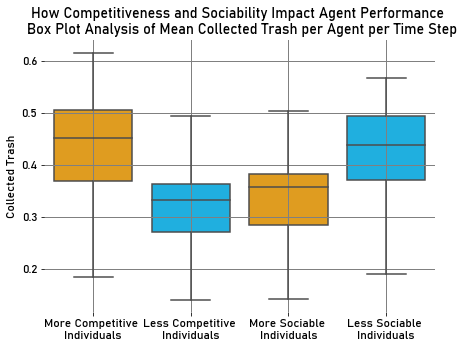

Mean More Competitive: 0.47093333399605664
Standard Deviation More Competitive: 0.08247221783197056
Mean Less Competitive: 0.4541669419241292
Standard Deviation Less Competitive: 0.08049358962702256
Mean More Sociable: 0.8063720892107951
Standard Deviation More Sociable: 0.05427139787624975
Mean Less Sociable: 0.13199468140636325
Standard Deviation Less Sociable: 0.04046106352954969


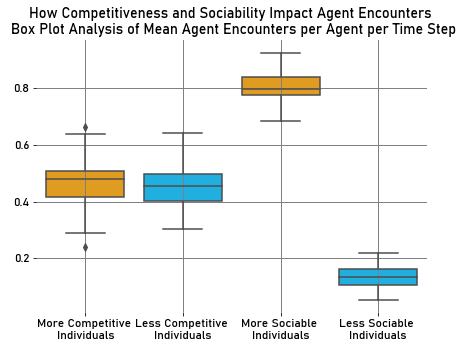

In [6]:
scenario1 = gameLoop()

###  Scenario 2: Shirt Color is relevant for the Social Context

In Scenario 2, the shirt color of the agents becomes relevant for the social context. The DIMA module has an impact on the behavior of the agents, as they will use their active identity and salience to determine their actions based on the social context.

Mean More Competitive: 0.28838938896701644
Standard Deviation More Competitive: 0.11497817713476113
Mean Less Competitive: 0.20482189208941354
Standard Deviation Less Competitive: 0.08040072511734199
Mean More Sociable: 0.23652664352736757
Standard Deviation More Sociable: 0.09405358074175552
Mean Less Sociable: 0.259120949162039
Standard Deviation Less Sociable: 0.09741781769374963


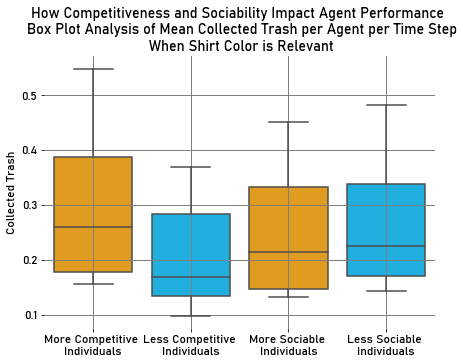

Mean More Competitive: 0.7229177433667491
Standard Deviation More Competitive: 0.0841391787365043
Mean Less Competitive: 0.6726330599368897
Standard Deviation Less Competitive: 0.08281966467841799
Mean More Sociable: 0.7374902630136644
Standard Deviation More Sociable: 0.0769222486790872
Mean Less Sociable: 0.6478724260785831
Standard Deviation Less Sociable: 0.09248026866419287


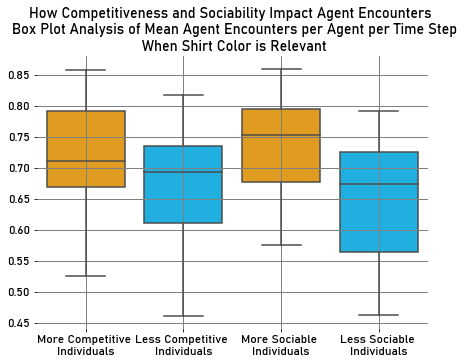

In [7]:
thresholdCluster = 0.2

scenario2 = gameLoop(["ShirtColor"])

### Comparison between the scenarios 

The impact of the DIMA module on agent behavior in Scenario 2 can be compared to the behavior of agents in Scenario 1, where the context is empty and the DIMA module has no impact on their behavior. This comparison can provide insights into the effectiveness of the DIMA model in simulating social contexts and influencing agent behavior.

Mean Scenario 1: 0.3753489136334888
Standard Deviation Scenario 1: 0.08910015251724084
Mean Scenario 2: 0.24699915131353042
Standard Deviation Scenario 2: 0.09447012551717013


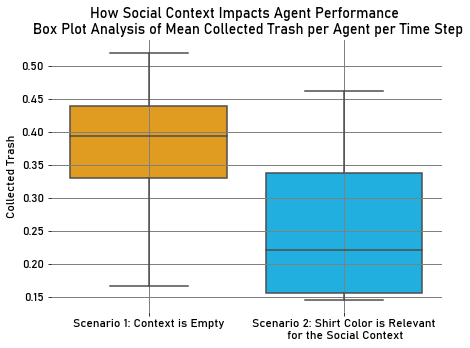

Mean Scenario 1: 0.4627656466606895
Standard Deviation Scenario 1: 0.06167113273032122
Mean Scenario 2: 0.6967967942719449
Standard Deviation Scenario 2: 0.07659368879483315


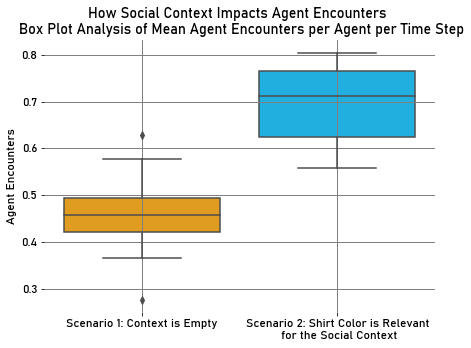

In [8]:
efficienciesScenario = []
agentEncountersScenario = []
#Plots for comparison between scenarios
efficienciesScenario.append(scenario1[0])
agentEncountersScenario.append(scenario1[1])
efficienciesScenario.append(scenario2[0])
agentEncountersScenario.append(scenario2[1])
plotEfficiencyCollectedTrashScenarios(efficienciesScenario)
plotMeasureAgentEncountersScenarios(agentEncountersScenario)